In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("craigslist_vehicles.csv/craigslist_vehicles.csv")

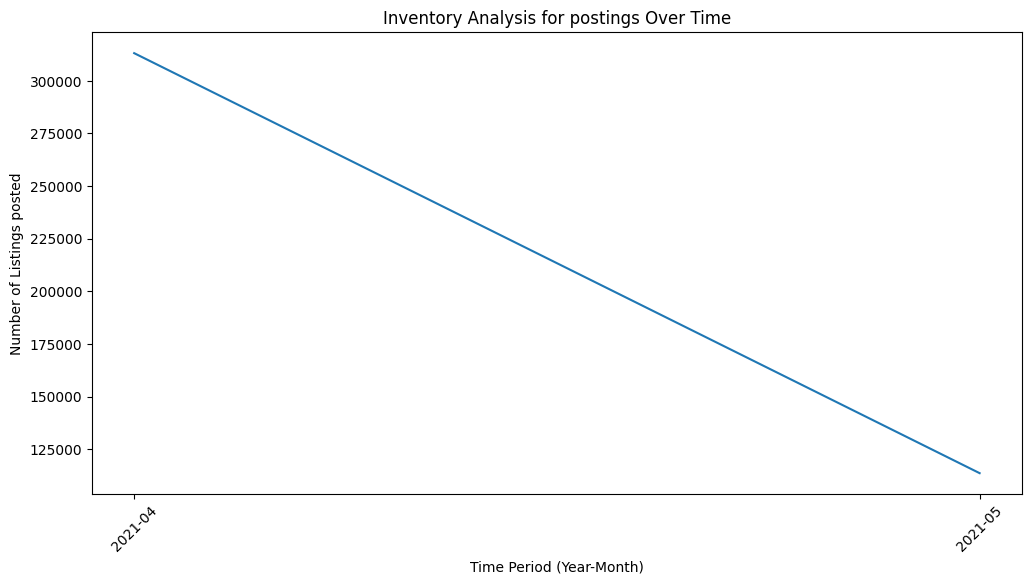

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensuring 'posting_date' is in datetime format
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['posting_month'] = df['posting_date'].dt.strftime('%Y-%m')
inventory_over_time = df.groupby('posting_month').size().reset_index(name='listing_count')

# Create a line plot to visualize the inventory over time
plt.figure(figsize=(12, 6))
plt.plot(inventory_over_time['posting_month'], inventory_over_time['listing_count'])
plt.xlabel('Time Period (Year-Month)')
plt.ylabel('Number of Listings posted')
plt.title('Inventory Analysis for postings Over Time')
plt.xticks(rotation=45)
plt.show()


In [3]:
inventory_over_time

,posting_month,listing_count
0,2021-04,313144
1,2021-05,113668


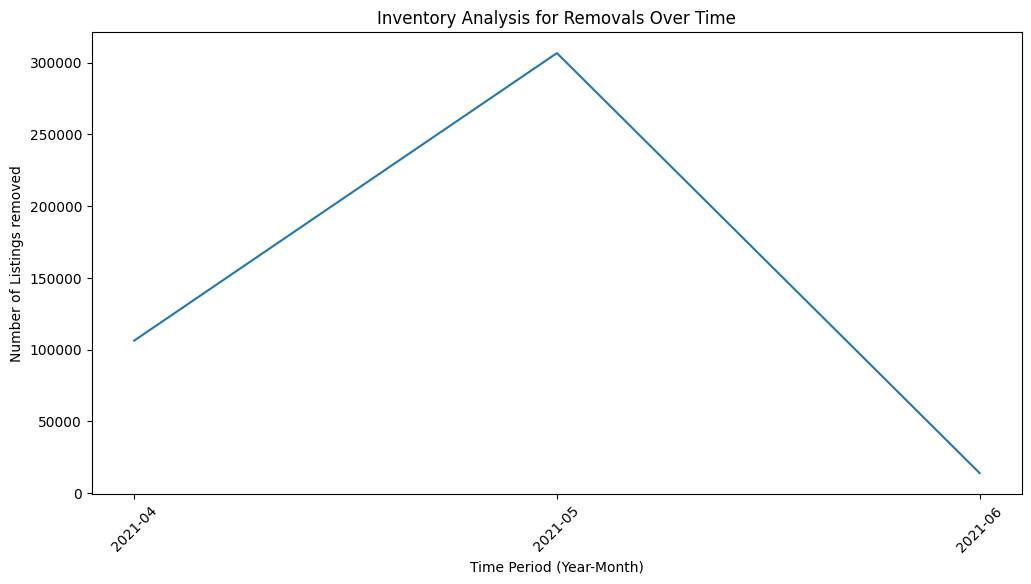

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensuring 'removal_date' is in datetime format
df['removal_date'] = pd.to_datetime(df['removal_date'])
df['removal_month'] = df['removal_date'].dt.strftime('%Y-%m')
inventoryremoved_over_time = df.groupby(['removal_month']).size().reset_index(name='listing_count')

# Create a line plot to visualize the inventory over time
plt.figure(figsize=(12, 6))
plt.plot(inventoryremoved_over_time['removal_month'], inventoryremoved_over_time['listing_count'])
plt.xlabel('Time Period (Year-Month)')
plt.ylabel('Number of Listings removed')
plt.title('Inventory Analysis for Removals Over Time')
plt.xticks(rotation=45)
plt.show()


In [5]:
inventoryremoved_over_time

,removal_month,listing_count
0,2021-04,106240
1,2021-05,306645
2,2021-06,13927


In [6]:
#The average price, the most common manufacturer, and the distribution of vehicle conditions for each time interval (monthly).
inventory_characteristics = df.groupby('posting_month').agg({'price': 'mean', 'manufacturer': pd.Series.mode, 'condition': pd.Series.mode}).reset_index()
inventory_characteristics

,posting_month,price,manufacturer,condition
0,2021-04,88622.679119,ford,good
1,2021-05,38256.680491,ford,good


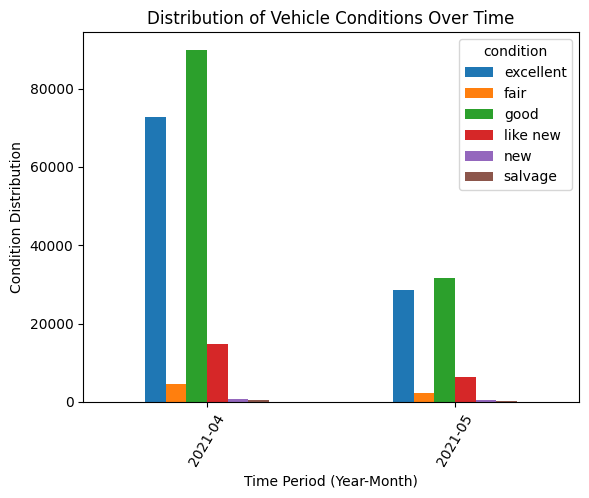

In [7]:
# Visualize the distribution of vehicle conditions over time
condition_distribution = df.groupby(['posting_month', 'condition'])['condition'].count().unstack().fillna(0).reset_index()
condition_distribution.plot(x='posting_month', kind='bar')
plt.xlabel('Time Period (Year-Month)')
plt.ylabel('Condition Distribution')
plt.title('Distribution of Vehicle Conditions Over Time')
plt.xticks(rotation=60)
plt.show()

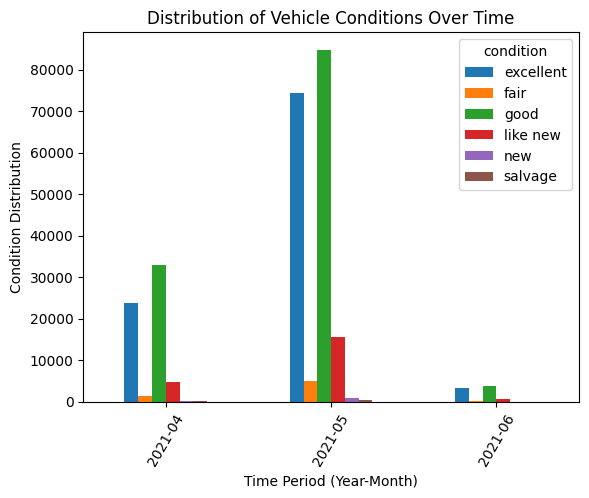

In [8]:
condition_distributionOfremoved = df.groupby(['removal_month', 'condition'])['condition'].count().unstack().fillna(0).reset_index()
condition_distributionOfremoved.plot(x='removal_month', kind='bar')
plt.xlabel('Time Period (Year-Month)')
plt.ylabel('Condition Distribution')
plt.title('Distribution of Vehicle Conditions Over Time')
plt.xticks(rotation=60)
plt.show()


c:\Users\justn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\justn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\justn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


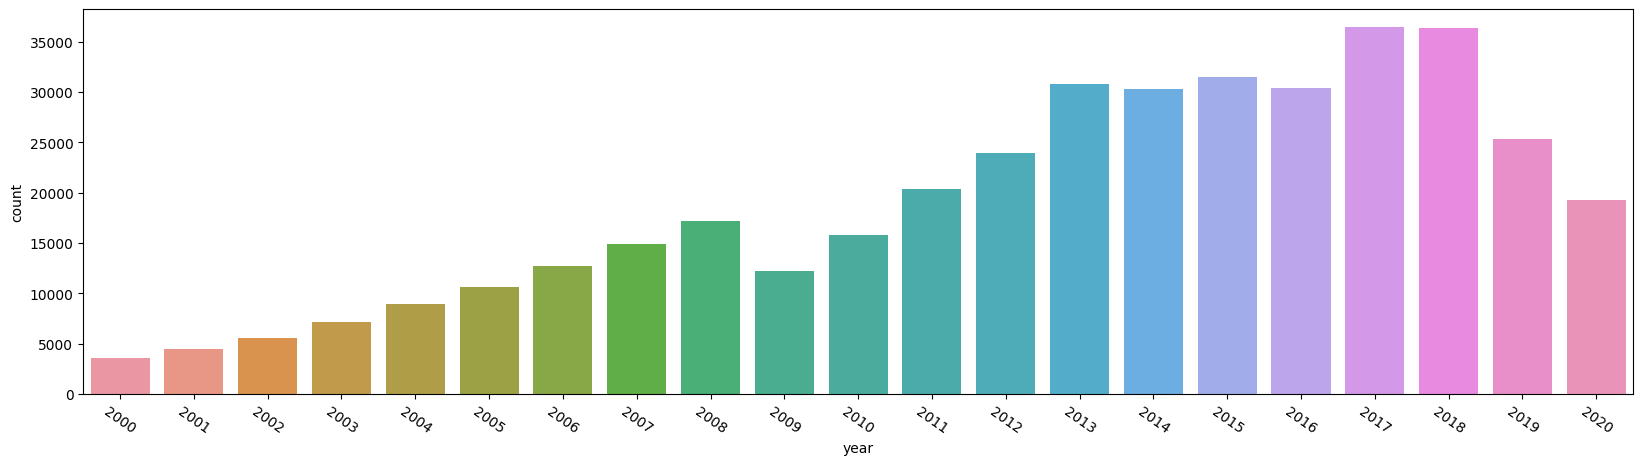

In [9]:
import seaborn as sns

df_year = df[(df["year"]>1999) & (df["year"]<2021)].copy()
df_year["year"] = df_year["year"].astype(int)
plt.figure(figsize=(20,5))
plt.xticks(rotation= -35)
sns.countplot(data= df_year,x="year")
plt.show()

